### Kehua Chu (uid: 806153163)
##### Due:  Thu, Feb 15, 6pm in Bruinlearn

### Import Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

### Problem 2
### The file card_transdata.csv contains data on 1,000,000 credit card transactions. The goal is to fit and test a model predicting whether a given transaction is fraudulent. Let the first 500,000 observations be the training set and the remaining observations be the test set.
### Since the dataset contains both continuous and categorical features, while SMOTE can only handle continuous features, we use SMOTE-NC, a version of SMOTE that can handle both. In Python, use imblearn.over_sampling.SMOTENC. Do not forget to provide information about the categorical features to SMOTENC.

In [2]:
data = pd.read_csv('card_transdata-1.csv')
data_copy = data.copy()
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [4]:
data_train = data[:500001]
data_test = data[500001:]

In [5]:
X_train = data_train.drop(columns = ['fraud'])
X_test = data_test.drop(columns = ['fraud'])
y_train = data_train['fraud']
y_test = data_test['fraud']

### (i) For each 𝛾 ∈ {0.1, 0.2, … , 1}, oversample the training set with the desired ratio 𝛾 of the number of samples in the minority class over the number of samples in the majority class.

In [6]:
# Identify minority and majority classes
minority_class_count = y_train.sum()
majority_class_count = len(y_train) - minority_class_count

# Specify categorical features indices (assuming they are stored in a list)
categorical_features_indices = [3,4,5,6]  # Update with the actual indices of categorical features


In [7]:
print(minority_class_count)
print(majority_class_count)

43667
456334


In [8]:
def oversample(gamma):
    num_samples_minority = int(gamma * majority_class_count)
    smote_nc = SMOTENC(categorical_features=categorical_features_indices, sampling_strategy=gamma, random_state = 42)
    X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled


### (ii) For each of the resulting oversampled datasets, fit a decision tree (with information gain as the feature selection criterion) and calculate its training and testing recall, precision, and 𝐹1 score.

In [9]:
def result(gamma):
    
    X_train_resampled, y_train_resampled = oversample(gamma)
    
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train_resampled, y_train_resampled)
    
    y_train_pred = tree.predict(X_train_resampled)
    y_test_pred = tree.predict(X_test)
    
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    print('Train recall:', train_recall)
    print('Test recall:', test_recall)

    train_precision = precision_score(y_train_resampled, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    print('Train precision:', train_precision)
    print('Test precision:', test_precision)
    
    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print('Train F1 Score:', train_f1)
    print('Test F1 Score:', test_f1)

    return
    

In [11]:
print('\033[1mResults for gamma == 0.1\033[0m')
result(0.1)

Results for gamma == 0.1
Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 1.0
Train F1 Score: 1.0
Test F1 Score: 0.9998513589224665


In [12]:
print('\033[1mResults for gamma == 0.2\033[0m')
result(0.2)

Results for gamma == 0.2
Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 0.9996341937401404
Train F1 Score: 1.0
Test F1 Score: 0.9996684767076308


In [13]:
print('\033[1mResults for gamma == 0.3\033[0m')
result(0.3)

Results for gamma == 0.3
Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 0.9995199341623994
Train F1 Score: 1.0
Test F1 Score: 0.9996113397347965


In [14]:
print('\033[1mResults for gamma == 0.4\033[0m')
result(0.4)

Results for gamma == 0.4
Train recall: 1.0
Test recall: 0.9997484909456741
Train precision: 1.0
Test precision: 0.9993600438827052
Train F1 Score: 1.0
Test F1 Score: 0.9995542296745876


In [15]:
print('\033[1mResults for gamma == 0.5\033[0m')
result(0.5)

Results for gamma == 0.5
Train recall: 1.0
Test recall: 0.9997256264861899
Train precision: 1.0
Test precision: 0.9993143484024318
Train F1 Score: 1.0
Test F1 Score: 0.9995199451365872


In [16]:
print('\033[1mResults for gamma == 0.6\033[0m')
result(0.6)

Results for gamma == 0.6
Train recall: 1.0
Test recall: 0.9996798975672215
Train precision: 1.0
Test precision: 0.9990859649924592
Train F1 Score: 1.0
Test F1 Score: 0.9993828430364122


In [17]:
print('\033[1mResults for gamma == 0.7\033[0m')
result(0.7)

Results for gamma == 0.7
Train recall: 1.0
Test recall: 0.9997713554051583
Train precision: 1.0
Test precision: 0.9986753151836287
Train F1 Score: 1.0
Test F1 Score: 0.9992230347349177


In [18]:
print('\033[1mResults for gamma == 0.8\033[0m')
result(0.8)

Results for gamma == 0.8
Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 0.9989033835187682
Train F1 Score: 1.0
Test F1 Score: 0.9993029129098243


In [19]:
print('\033[1mResults for gamma == 0.9\033[0m')
result(0.9)

Results for gamma == 0.9
Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 0.9988805629169332
Train F1 Score: 1.0
Test F1 Score: 0.9992914933491795


In [20]:
print('\033[1mResults for gamma == 1.0\033[0m')
result(1.0)

Results for gamma == 1.0
Train recall: 1.0
Test recall: 0.9997256264861899
Train precision: 1.0
Test precision: 0.9989490518620059
Train F1 Score: 1.0
Test F1 Score: 0.9993371883070875


### (iii) Draw a plot of training and testing 𝐹1 score as functions of 𝛾. Does using SMOTE-NC improve the decision tree’s performance?

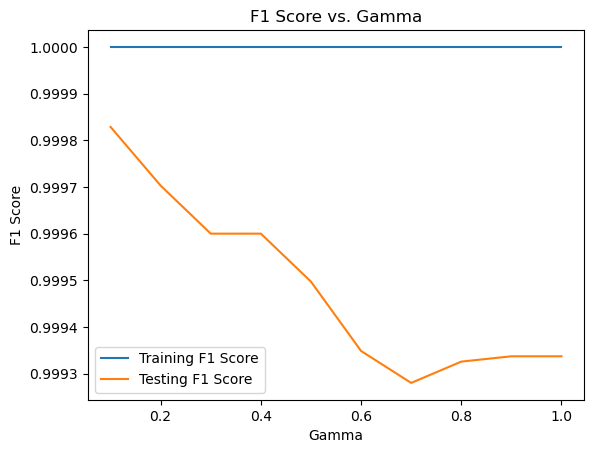

In [21]:
# Define a list of gamma values
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize lists to store training and testing F1 scores
train_f1_scores = []
test_f1_scores = []

# Calculate F1 scores for each gamma value
for gamma in gammas:
    X_train_resampled, y_train_resampled = oversample(gamma)
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train_resampled, y_train_resampled)
    y_train_pred = tree.predict(X_train_resampled)
    y_test_pred = tree.predict(X_test)
    train_f1 = f1_score(y_train_resampled, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot the training and testing F1 scores
plt.plot(gammas, train_f1_scores, label='Training F1 Score')
plt.plot(gammas, test_f1_scores, label='Testing F1 Score')
plt.xlabel('Gamma')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Gamma')
plt.legend()
plt.show()


In [10]:
# Original Dataset

tree_original = DecisionTreeClassifier(criterion='entropy')
tree_original.fit(X_train, y_train)

y_train_pred = tree_original.predict(X_train)
y_test_pred = tree_original.predict(X_test)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print('Train F1 Score:', train_f1)
print('Test F1 Score:', test_f1)

Train recall: 1.0
Test recall: 0.9997027620267057
Train precision: 1.0
Test precision: 1.0
Train F1 Score: 1.0
Test F1 Score: 0.9998513589224665


We could see from the graph that with the increase of gamma, although the training f1 score remains 1, testing f1 score decreases a little from around 0.9999 to 0.9993, and rises again after gamma == 0.7. This indicates that after doing SMOTE-NC, our model may suffer from overfitting, which is pretty bad. And looking at the tesing f1 score of original dataset (without oversampling), it's higher than any f1 score after using SMOTE-NC, meaning that SMOTE-NC doesn't improve the decision tree’s performance.